In [ ]:
!pip install easyocr

([[71, 193], [225, 193], [225, 235], [71, 235]], 'No VOLTEAR a', 0.6536844542159744)
([[77, 233], [225, 233], [225, 269], [77, 269]], 'LA IZQUIERDA', 0.5278279059288832)
([[93, 293], [211, 293], [211, 307], [93, 307]], 'mtc-puntos.net.pe', 0.5421239877539811)


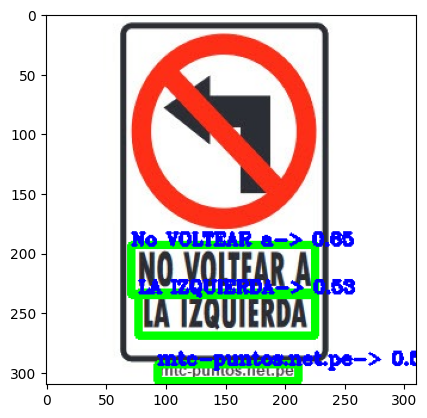

In [71]:
# importar los módulos necesarios
import cv2
import easyocr
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# leer la imagen desde una URL pública
image_path = "/content/signal.jpg"
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# mostrar la imagen
#cv2_imshow(img)

# crear un objeto Reader de easyocr con el idioma español
reader = easyocr.Reader(['es'], gpu=False)

# detectar el texto en la imagen
text_ = reader.readtext(img)

# dibujar el bbox y texto
for t in text_:
  print(t)
  bbox, text, score = t
  # dibujando el bbox
  cv2.rectangle(img,bbox[0],bbox[2],(0,255,0),5)
  # colocando el texto en la esquina, con un tipo de letra especifico,tamaño, color y thickness(espesor)
  cv2.putText(img,text + "-> " + str(round(score,2)), bbox[0], cv2.FONT_HERSHEY_COMPLEX,0.5,(255,0,0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # mostrando la imagen original con bbox
plt.show()



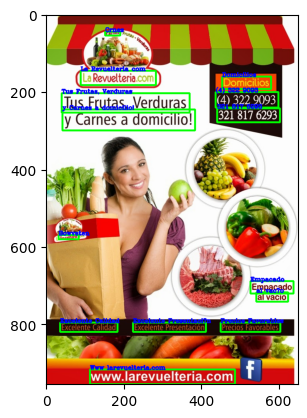

In [46]:
# importar los módulos necesarios
import cv2
import easyocr
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# leer la imagen desde una URL pública
image_path = "/content/anuncio.jpg"
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# mostrar la imagen
#cv2_imshow(img)

# crear un objeto Reader de easyocr con el idioma español
reader = easyocr.Reader(['es'], gpu=False)

# detectar el texto en la imagen
text_ = reader.readtext(img)

# dibujar el bbox y texto
for t in text_:
  bbox, text, score = t
  # obtener las coordenadas del cuadro delimitador
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1]))
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1]))
  bl = (int(bl[0]), int(bl[1]))


  # dibujando el bbox
  cv2.rectangle(img,tl, br,(0,255,0),3)
  # colocando el texto en la esquina, con un tipo de letra especifico,tamaño, color y thickness(espesor)
  cv2.putText(img,text, tl, cv2.FONT_HERSHEY_COMPLEX, 0.5, (255,0,0), 2)

plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # mostrando la imagen original con bbox
plt.show()



[([[1239, 185], [1317, 185], [1317, 223], [1239, 223]], 'intel', 0.9999518591136812), ([[109, 265], [340, 265], [340, 317], [109, 317]], '15.6 FHD', 0.9971946491113896), ([[1236, 244], [1406, 244], [1406, 298], [1236, 298]], 'cORe', 0.8061668872833252), ([[1380, 332], [1414, 332], [1414, 364], [1380, 364]], 'i5', 0.9735047001255455), ([[110, 351], [338, 351], [338, 401], [110, 401]], '8GB RAM', 0.995816247445616), ([[1239, 401], [1399, 401], [1399, 437], [1239, 437]], 'GEFORCE', 0.9999420563150446), ([[111, 434], [367, 434], [367, 490], [111, 490]], '512GB SSD', 0.9423539653466992), ([[442, 402], [986, 402], [986, 530], [442, 530]], 'LEGION', 0.8666544880940892), ([[1135, 445], [1211, 445], [1211, 465], [1135, 465]], 'nvIDIA', 0.43848663972823915), ([[1239, 433], [1315, 433], [1315, 469], [1239, 469]], 'RTX', 0.9990802724962096), ([[660, 740], [764, 740], [764, 770], [660, 770]], 'LEGION', 0.4511680323739877), ([[342, 1316], [549, 1316], [549, 1353], [342, 1353]], 'Obturador de', 0.999

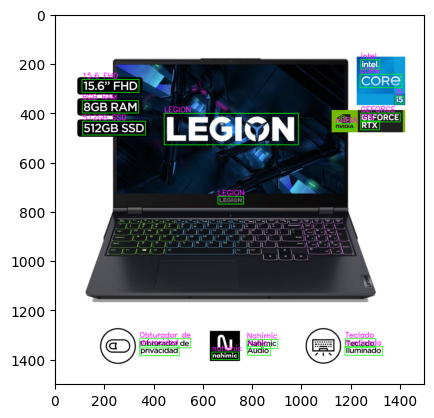

In [50]:
# importar los módulos necesarios
import cv2
import easyocr
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow

# leer la imagen desde una URL
image_path = "laptop.jpg"
img = cv2.imread(image_path, cv2.IMREAD_COLOR)

# mostrar la imagen original
# cv2_imshow(img)

# crear un objeto Reader de easyocr con el idioma español
reader = easyocr.Reader(['es'], gpu=False)

# detectar el texto en la imagen
text = reader.readtext(img)
print(text)

# threshold
threshold=0.25

# dibujar los cuadros delimitadores y el texto reconocido en la imagen
for (bbox, txt, score) in text:
  # obtener las coordenadas del cuadro delimitador
  (tl, tr, br, bl) = bbox
  tl = (int(tl[0]), int(tl[1])) # t=top l=left
  tr = (int(tr[0]), int(tr[1]))
  br = (int(br[0]), int(br[1])) # b=botton r
  bl = (int(bl[0]), int(bl[1]))

  # si supera el umbral % de deteccion, que grafique el bbox
  if score > threshold:
    # dibujar el cuadro delimitador con color verde
    cv2.rectangle(img, tl, br, (0, 255, 0), 2)
    # dibujar el texto reconocido  -5 permite mover la ubicacion del texto amostrar
    cv2.putText(img, txt, (tl[0], tl[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 20, 255), 2)

# mostrar la imagen con el texto reconocido
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#cv2_imshow(img)
plt.show() # optional

# Modularizando

In [51]:
# importar los módulos necesarios
import cv2
import easyocr
import matplotlib.pyplot as plt
from google.colab.patches import cv2_imshow


def text_detection_ocr(image_path, language='es',threshold=0.3):
  # leer la imagen desde una URL
  img = cv2.imread(image_path, cv2.IMREAD_COLOR)

  # crear un objeto Reader de easyocr con el idioma español
  reader = easyocr.Reader([f'{language}'], gpu=False)

  # detectar el texto en la imagen
  text = reader.readtext(img)

  textos = []
  # dibujar los cuadros delimitadores y el texto reconocido en la imagen
  for (bbox, txt, score) in text:
    textos.append(txt)
    # obtener las coordenadas del cuadro delimitador
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1])) # t=top l=left
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1])) # b=botton
    bl = (int(bl[0]), int(bl[1]))

    # si supera el umbral % deseado, graficar el bbox
    if score > threshold:
      # dibujar el cuadro delimitador con color verde
      cv2.rectangle(img, tl, br, (0, 255, 0), 2)
      # dibujar el texto reconocido  -5 permite mover la ubicacion del texto amostrar
      cv2.putText(img, txt, (tl[0], tl[1] - 5), cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 20, 255), 2)

  # mostrar la imagen con el texto reconocido
  plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))#cv2_imshow(img)
  plt.show() # optional

  return textos

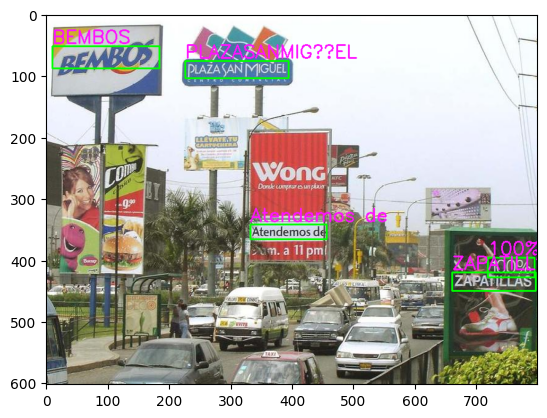

In [64]:
image_path = "/content/contaminacion_visual_3.jpg"
textos = text_detection_ocr(image_path, language='es',threshold=0.5)

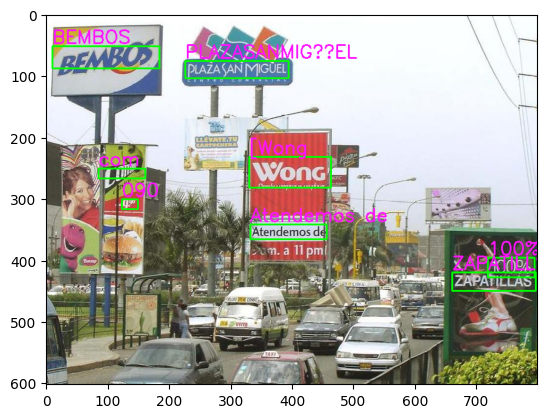

In [63]:
textos = text_detection_ocr(image_path, language='es',threshold=0.25)

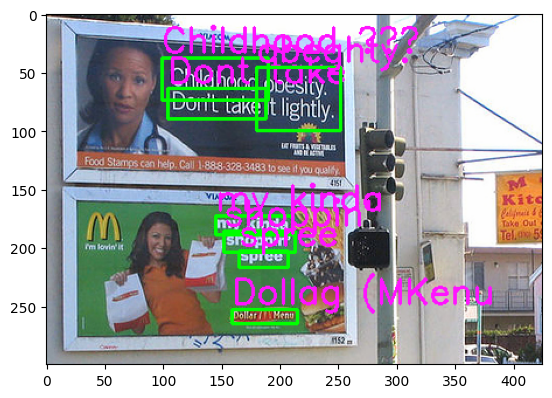

In [67]:
image_path = "/content/Picture1.png"
textos = text_detection_ocr(image_path, language='en',threshold=0.1)